# Lightspeed introduction to `pandas`

Pandas is the library providing tools to crunch data simply.

It mainly provides a `DataFrame` object

In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame({ 
    'A' : 1.,
    'B' : pd.Timestamp('20130102'),
    'C' : pd.Series(1, dtype='float32'),
    'C' : pd.Series(1, index=[0, 2], dtype='float32'),
    'D' : pd.Series([1, 2, 3, 4], dtype='int32'),
    'E' : pd.Categorical(["test", "train", "test", "train"]),
    'F' : 'foo',
    'G' : np.random.randn(4)
})
df

,A,B,C,D,E,F,G
0,1.0,2013-01-02,1.0,1,test,foo,0.565129
1,1.0,2013-01-02,NaN,2,train,foo,1.181305
2,1.0,2013-01-02,1.0,3,test,foo,-0.360288
3,1.0,2013-01-02,NaN,4,train,foo,1.087078


## Basic things

In [2]:
# Columns can be accessed by name (when it makes sense)
df.B

0   2013-01-02
1   2013-01-02
2   2013-01-02
3   2013-01-02
Name: B, dtype: datetime64[ns]

In [3]:
# Or like keys in a dict
df['B']

0   2013-01-02
1   2013-01-02
2   2013-01-02
3   2013-01-02
Name: B, dtype: datetime64[ns]

In [4]:
type(df.B)

pandas.core.series.Series

In [5]:
# To select a list of columns
df[['A', 'C']]

,A,C
0,1.0,1.0
1,1.0,NaN
2,1.0,1.0
3,1.0,NaN


In [6]:
df.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
G           float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       4 non-null      float64       
 1   B       4 non-null      datetime64[ns]
 2   C       2 non-null      float32       
 3   D       4 non-null      int32         
 4   E       4 non-null      category      
 5   F       4 non-null      object        
 6   G       4 non-null      float64       
dtypes: category(1), datetime64[ns](1), float32(1), float64(2), int32(1), object(1)
memory usage: 292.0+ bytes


## Groupby and aggregations

Basic syntax: group rows using the categories of a column and perform an aggregation on the groups

In [8]:
df

,A,B,C,D,E,F,G
0,1.0,2013-01-02,1.0,1,test,foo,0.565129
1,1.0,2013-01-02,NaN,2,train,foo,1.181305
2,1.0,2013-01-02,1.0,3,test,foo,-0.360288
3,1.0,2013-01-02,NaN,4,train,foo,1.087078


In [9]:
# Compute the sum of D for each category in E
df.groupby('E').sum().reset_index()

,E,A,C,D,G
0,test,2.0,2.0,4,0.204841
1,train,2.0,0.0,6,2.268382


# Lightspeed introduction to `seaborn`

It's a graphics library built on top of `matplotlib` which
- works pretty neatly with `pandas` `DataFrame`s
- provides simpler ways to make nice visualization of datasets

Let's illustrate this using the toy `tips` dataset that comes with `seaborn`

In [10]:
import seaborn as sns

# Load one of the data sets that comes with seaborn
tips = sns.load_dataset("tips")

# First 10 rows of the dataframe
tips.head(n=10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [11]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [12]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [13]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [14]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


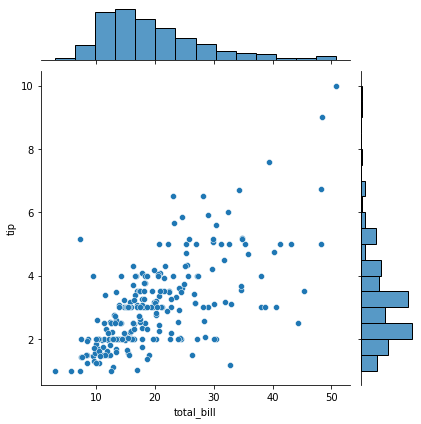

In [15]:
sns.jointplot("total_bill", "tip", data=tips)

## Exercice 1

Compute the tip percentage of Dinner VS Lunch for each day of the week

In [16]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Answer

In [17]:
tips['tip_percentage'] = 100 * tips['tip'] / tips['total_bill']
tips.groupby(['time', 'day']).mean()[['tip_percentage']]

tip_percentage
time   day                 
Lunch  Thur       16.130074
       Fri        18.876489
       Sat              NaN
       Sun              NaN
Dinner Thur       15.974441
       Fri        15.891611
       Sat        15.315172
       Sun        16.689729

## Exercice 2 

Convert `size` as a categorical variable

### Answer

In [18]:
# We want to deal with size as a categorical variable
tips['size'] = tips['size'].astype('category')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


## Exercice 3

One-hot encode (or "create dummies" or "binarize") the categorical variables (this can be easily achieved with the `pandas.get_dummies` function)

### Answer

In [19]:
data = pd.get_dummies(tips, prefix_sep='#')
data.head(5)

,total_bill,tip,tip_percentage,sex#Male,sex#Female,smoker#Yes,smoker#No,day#Thur,day#Fri,day#Sat,day#Sun,time#Lunch,time#Dinner,size#1,size#2,size#3,size#4,size#5,size#6
0,16.99,1.01,5.944673,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0
1,10.34,1.66,16.054159,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
2,21.01,3.50,16.658734,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
3,23.68,3.31,13.978041,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0
4,24.59,3.61,14.680765,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0


Only categorical columns have been "binarized". For instance, the `'day'` column is replaced by 4 columns named `'day#Thur'`, `'day#Fri'`, `'day#Sat'`, `'day#Sun'`, since `'day'` has 4 modalities (see next line).

In [20]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

## Remark

Sums over dummies for `sex`, `smoker`, `day`, `time` and `size` are all equal to one.

- Leads to colinearities, hence bad conditioning of the features matrix
- Can be checked through a SVD (but don't compute the SVD of a large matrix!)

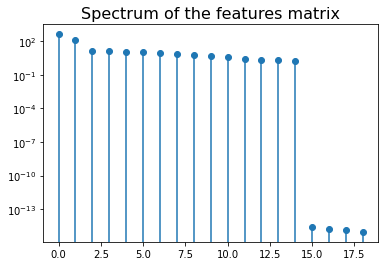

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

s = np.linalg.svd(data, compute_uv=False)
plt.yscale('log')
plt.title('Spectrum of the features matrix', fontsize=16)
_ = plt.stem(s, use_line_collection=True)

In [22]:
data = pd.get_dummies(tips, prefix_sep='#', drop_first=True)
data.head()

,total_bill,tip,tip_percentage,sex#Female,smoker#No,day#Fri,day#Sat,day#Sun,time#Dinner,size#2,size#3,size#4,size#5,size#6
0,16.99,1.01,5.944673,1,1,0,0,1,1,1,0,0,0,0
1,10.34,1.66,16.054159,0,1,0,0,1,1,0,1,0,0,0
2,21.01,3.50,16.658734,0,1,0,0,1,1,0,1,0,0,0
3,23.68,3.31,13.978041,0,1,0,0,1,1,1,0,0,0,0
4,24.59,3.61,14.680765,1,1,0,0,1,1,0,0,1,0,0


Now, if a categorical feature has $K$ modalities, we use only $K-1$ dummies

In [23]:
data.head()

,total_bill,tip,tip_percentage,sex#Female,smoker#No,day#Fri,day#Sat,day#Sun,time#Dinner,size#2,size#3,size#4,size#5,size#6
0,16.99,1.01,5.944673,1,1,0,0,1,1,1,0,0,0,0
1,10.34,1.66,16.054159,0,1,0,0,1,1,0,1,0,0,0
2,21.01,3.50,16.658734,0,1,0,0,1,1,0,1,0,0,0
3,23.68,3.31,13.978041,0,1,0,0,1,1,1,0,0,0,0
4,24.59,3.61,14.680765,1,1,0,0,1,1,0,0,1,0,0


## Exercice 4

Normalize the continuous features

### Answer

In [24]:
def normalize_min_max(columns, data):
    """Min-max scale columns in data

    Parameters
    ----------
    columns : `List[str]`
        A list of columns to min-max scale

    data : `pandas.DataFrame`
        A dataframe containing the given columns

    Returns
    -------
    output : `None`
        data is modified inplace and not return by the fonction
    """
    min_max = data[columns].agg(['min', 'max'])
    for col in columns:
        data[col] -= min_max.loc['min', col]
        data[col] /= (min_max.loc['max', col] - min_max.loc['min', col])    

In [25]:
normalize_min_max(['total_bill', 'tip'], data)

In [26]:
data[['total_bill', 'tip']].describe()

,total_bill,tip
count,244.000000,244.000000
mean,0.350145,0.222031
std,0.186477,0.153738
min,0.000000,0.000000
25%,0.215281,0.111111
50%,0.308442,0.211111
75%,0.441087,0.284722
max,1.000000,1.000000
